# **Import data library**
## https://keras.io/api/applications/

In [2]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

# **Buat inisiasi model**

In [3]:
model = ResNet50(weights='imagenet')

102973440/102967424 [==============================] - 218s 2us/step


In [4]:
# Masukan file gambar berupa file .jpg
gambar = 'images/kucing-anggora.jpg'

# **Cek data raw RGB dari file tersebut**

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.io import imread

In [6]:
imread(gambar)

array([[[177, 235, 197],
        [177, 235, 197],
        [177, 234, 199],
        ...,
        [251, 240, 212],
        [250, 239, 209],
        [252, 239, 207]],

       [[177, 235, 197],
        [177, 234, 199],
        [178, 235, 200],
        ...,
        [251, 240, 212],
        [250, 239, 209],
        [252, 239, 207]],

       [[178, 235, 200],
        [178, 235, 200],
        [179, 235, 200],
        ...,
        [251, 240, 210],
        [250, 239, 209],
        [252, 239, 207]],

       ...,

       [[211, 239, 181],
        [211, 239, 181],
        [211, 239, 181],
        ...,
        [ 94,  67,  46],
        [ 92,  67,  45],
        [ 92,  67,  45]],

       [[211, 239, 181],
        [211, 239, 181],
        [211, 239, 180],
        ...,
        [ 94,  67,  46],
        [ 92,  67,  45],
        [ 92,  67,  45]],

       [[209, 239, 179],
        [209, 239, 179],
        [209, 239, 179],
        ...,
        [ 93,  66,  45],
        [ 92,  67,  45],
        [ 92,  67,  45]]

In [7]:
img = imread(gambar)

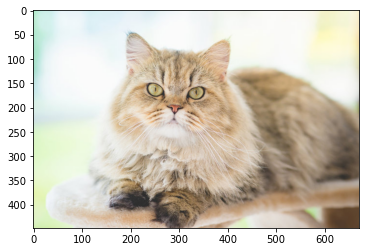

In [8]:
# Tampilkan gambar dalam betuk plot
plt.imshow(img)

In [9]:
# Perkecil ukuran image supaya mudah dalam training model
img = image.load_img(gambar, target_size=(224, 224)) # target_size=(panjang, lebar)

In [10]:
# Ubah ke dalam bentuk array data
x = image.img_to_array(img)

In [11]:
# Gunakan fungsi expand_dims() untuk menambahkan jumlah gambar
# https://www.it-swarm-id.com/id/python/metode-preprocess-input-dalam-keras/835282425/
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [12]:
# Buat metode prediksi
preds = model.predict(x)

In [13]:
preds

array([[4.64526920e-07, 4.52401855e-06, 4.32085017e-07, 2.35956080e-07,
        1.49961284e-06, 3.85786770e-05, 1.53190342e-06, 4.65660878e-06,
        2.04387088e-05, 1.06456289e-04, 1.16444926e-05, 2.04930457e-05,
        1.77201815e-04, 3.39252547e-05, 5.55423549e-06, 1.51708809e-05,
        1.76397625e-05, 1.41602077e-05, 6.69105384e-06, 6.92258300e-06,
        2.51210604e-05, 5.02727235e-05, 2.69583543e-04, 8.25958341e-06,
        2.54824321e-04, 9.15046769e-07, 1.57093348e-06, 3.33608841e-06,
        4.79126356e-07, 1.11043403e-06, 1.97685640e-05, 1.17884974e-05,
        2.46888817e-06, 9.57229304e-07, 9.71888198e-07, 4.06475147e-06,
        5.14800467e-06, 2.99405747e-06, 1.04635701e-05, 8.45543764e-06,
        2.22853873e-06, 1.08847607e-05, 9.75381772e-06, 1.01674341e-04,
        7.31903037e-06, 5.80404560e-07, 1.24508260e-05, 1.07420792e-05,
        6.08877485e-07, 2.53446001e-06, 1.92990183e-06, 2.82496580e-06,
        8.78751143e-06, 4.76164814e-06, 9.90999706e-06, 1.295709

In [14]:
# decode the results into a list of tuples (class, description, probability)
 # (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=5)[0]) # Tampilkan list  
# 5 teratas dengan prediksi mendekati label/nama objek

40960/35363 [==================================] - 0s 2us/step
Predicted: [('n02123394', 'Persian_cat', 0.6371332), ('n02127052', 'lynx', 0.15600477), ('n02123045', 'tabby', 0.07894282), ('n02123159', 'tiger_cat', 0.049866736), ('n02124075', 'Egyptian_cat', 0.034054417)]
